# DATA PREPROCESSING ON IMBALANCED DATASET

**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
import seaborn as sns

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import plotly.express          as ex
import plotly.graph_objs       as go
import time

**READING AND DISPLAYING THE DATASET**

In [3]:
data=pd.read_csv('../input/water-potability/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


**CHECKING FOR NULL VALUES**

In [5]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
for col in data.columns:
    p=(data[col].isnull().sum()/len(data))*100
    print('the column {0} have {1} percent of NAN values'.format(col,p.round(2)))
    print()

the column ph have 14.99 percent of NAN values

the column Hardness have 0.0 percent of NAN values

the column Solids have 0.0 percent of NAN values

the column Chloramines have 0.0 percent of NAN values

the column Sulfate have 23.84 percent of NAN values

the column Conductivity have 0.0 percent of NAN values

the column Organic_carbon have 0.0 percent of NAN values

the column Trihalomethanes have 4.95 percent of NAN values

the column Turbidity have 0.0 percent of NAN values

the column Potability have 0.0 percent of NAN values



**STATISTICAL IMPUTATION USING MEDIANS**

In [7]:
data["ph"].fillna(value = data["ph"].median(), inplace = True)
data["Sulfate"].fillna(value = data["Sulfate"].median(), inplace = True)
data["Trihalomethanes"].fillna(value = data["Trihalomethanes"].median(), inplace = True)

**CHECKING FOR PRESENCE OF NULL VALUES AGAIN**

In [8]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [9]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [11]:
X = data.drop('Potability', axis=1)
y = data['Potability']
X__train, X__test_, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 20
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

scaler = StandardScaler()
accuracy_scores = []

for train_index, test_index in kfold.split(X):
  X__train, X__test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

X_train = scaler.fit_transform(X__train)
X_test = scaler.transform(X__test)

**CHECKING WHETHER THE DATASET IS BALANCED**

Text(0.5, 1.0, 'Comparison between Class 0 and Class 1 on Dataset')

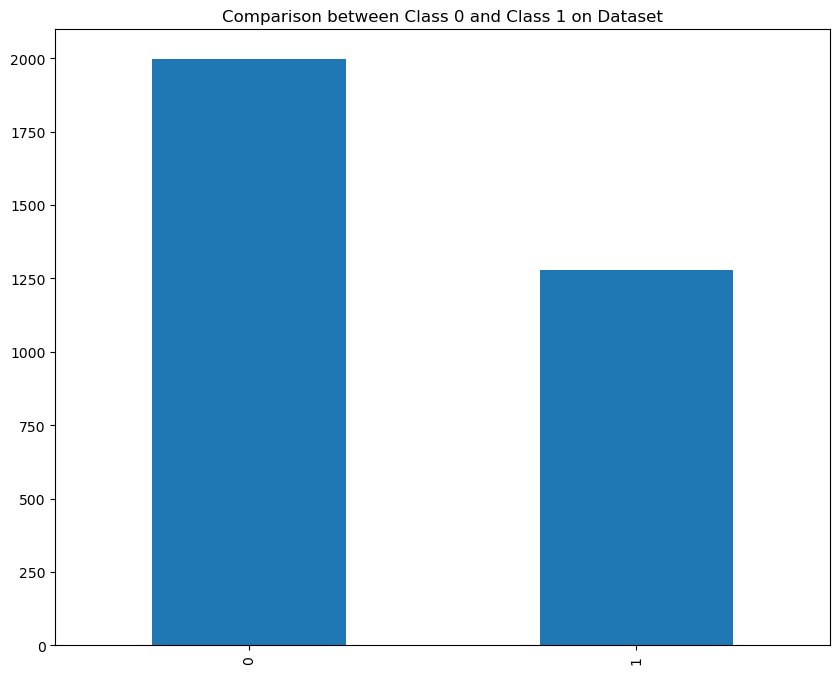

In [12]:
indpie = data['Potability'].value_counts()
indpie.plot(kind='bar',figsize=(10,8))
plt.title("Comparison between Class 0 and Class 1 on Dataset")

**OVERSAMPLING USING SMOTE TO BALANCE THE DATASET**

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X, y)

print("Amount of Data before Balancing:", len(data))
print("Amount of Data after Balancing:", len(X_balanced))

Amount of Data before Balancing: 3276
Amount of Data after Balancing: 3996


In [15]:
data_balanced = pd.concat([X_balanced, y_balanced], axis=1)
data_balanced.to_csv('file_balanced.csv', index=False)

#  Balanced Dataset

In [16]:
balanced = pd.read_csv("/kaggle/working/file_balanced.csv")
balanced

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3991,5.022446,245.684084,8702.095163,9.103049,352.596484,411.212333,15.271334,71.115981,4.152726,1
3992,5.460806,220.895921,11256.240145,6.876668,344.002568,356.253108,14.989310,58.498421,2.830708,1
3993,8.094392,230.321470,27020.746081,6.709849,277.273989,411.702858,13.470971,50.817653,4.594590,1
3994,5.786548,170.914116,16418.243611,7.440535,373.306873,410.091326,13.762025,87.228080,3.444903,1


**DOUBLE-CHECKING THE PRESENCE OF NULL VALUES**

In [17]:
balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3996 non-null   float64
 1   Hardness         3996 non-null   float64
 2   Solids           3996 non-null   float64
 3   Chloramines      3996 non-null   float64
 4   Sulfate          3996 non-null   float64
 5   Conductivity     3996 non-null   float64
 6   Organic_carbon   3996 non-null   float64
 7   Trihalomethanes  3996 non-null   float64
 8   Turbidity        3996 non-null   float64
 9   Potability       3996 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 312.3 KB


In [18]:
balanced.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [19]:
X = balanced.drop('Potability', axis=1)
y = balanced['Potability']
X__train, X__test_, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 20
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

scaler = StandardScaler()
accuracy_scores = []

for train_index, test_index in kfold.split(X):
  X__train, X__test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

X_train = scaler.fit_transform(X__train)
X_test = scaler.transform(X__test)

**SPLITTING THE DATASET ( 80:20 RATIO )**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**DATA VISUALIZATION**

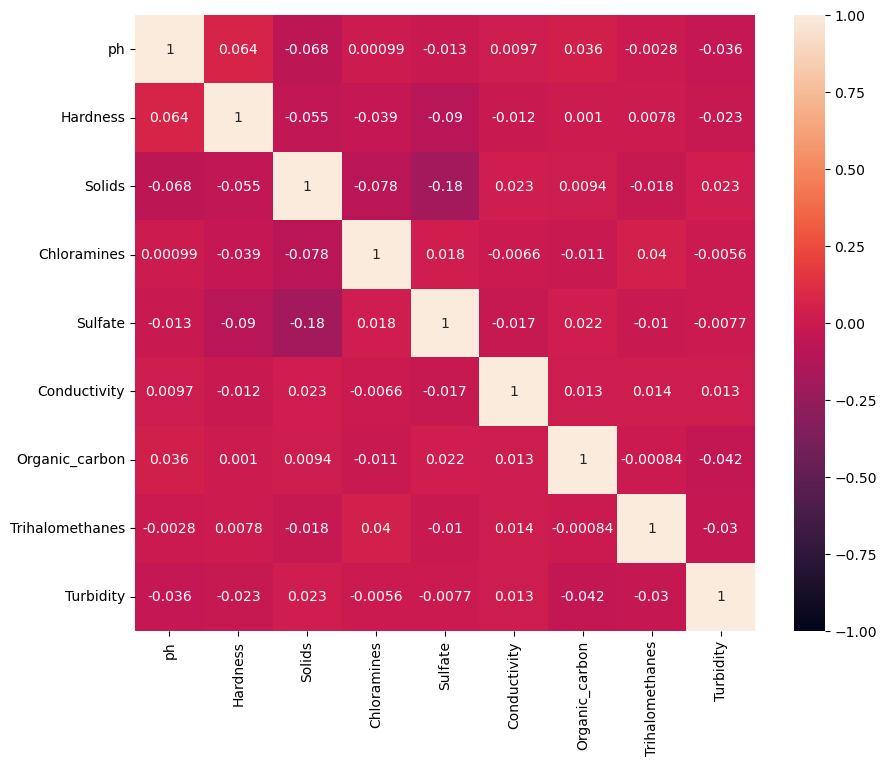

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(X_train.corr(),annot=True,vmin=-1)
plt.show()

In [22]:
T = balanced.copy()
T.Potability =  T.Potability.map({1:'Potable',0:'Not Potable'})
ex.pie(T,names='Potability',title='Distribution of Target Labels (Potability)')

<Figure size 1800x1500 with 0 Axes>

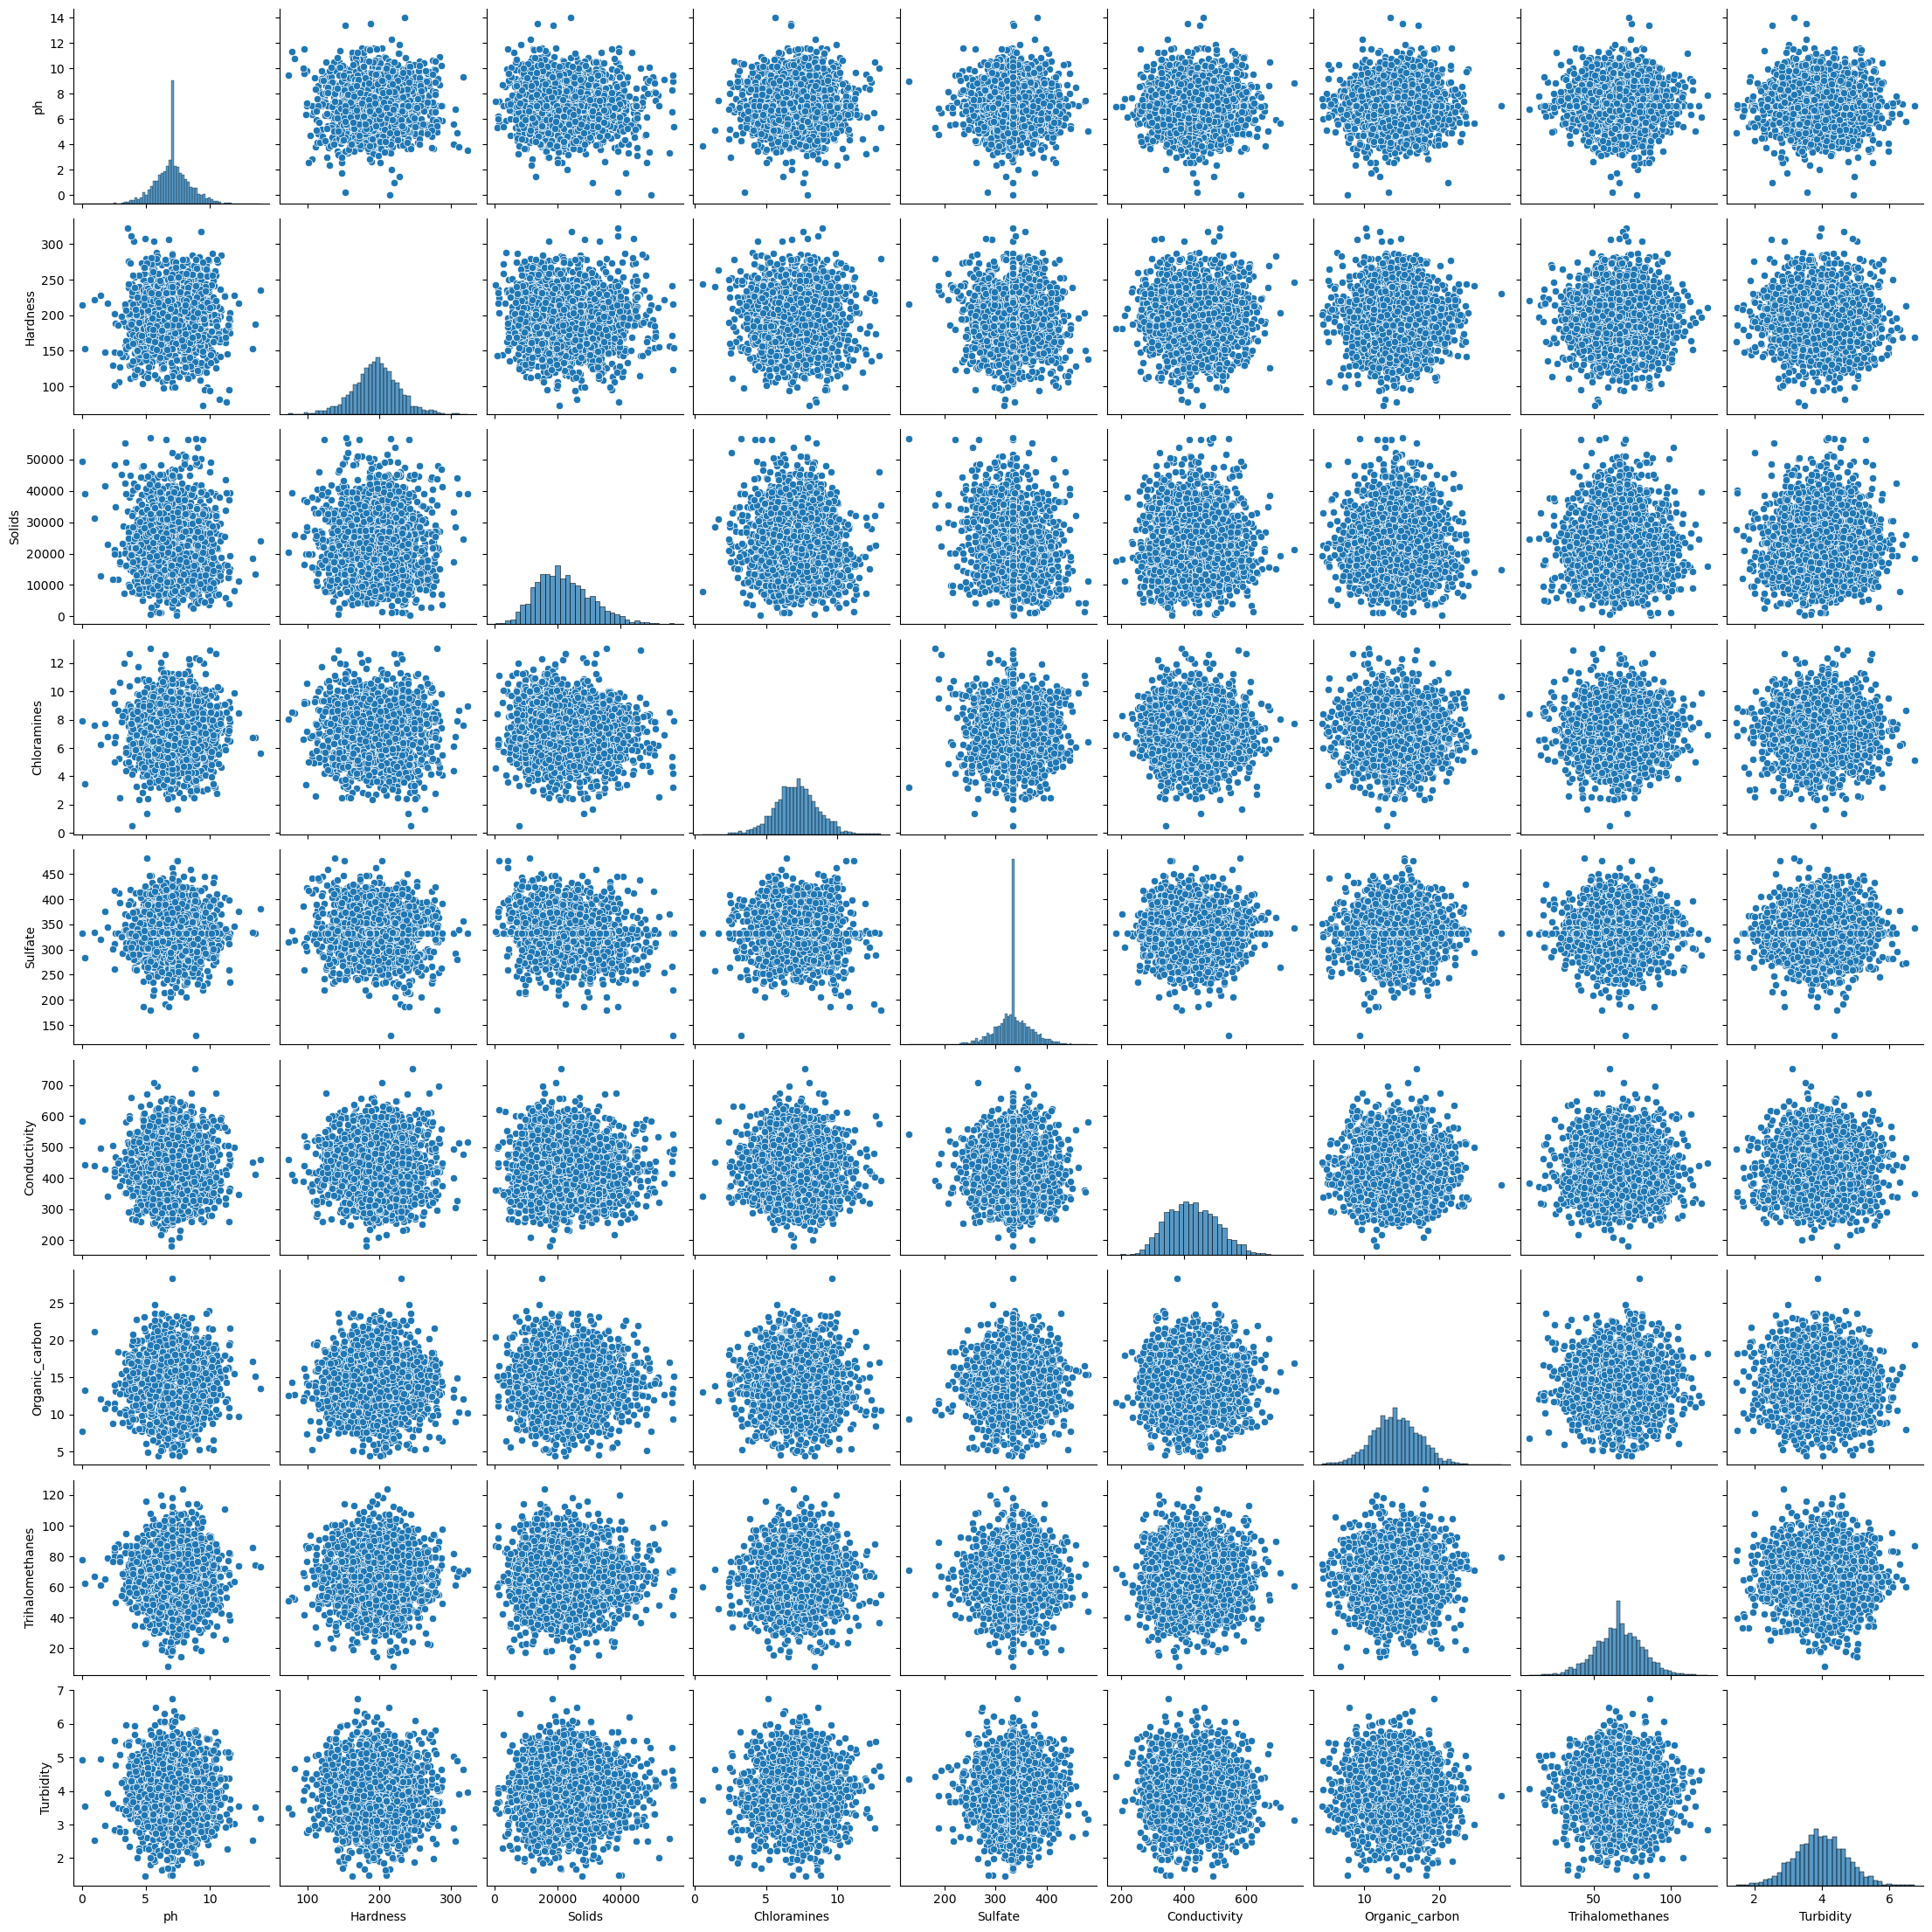

In [23]:
plt.figure(figsize=(18,15))
sns.pairplot(X_train)
plt.show()

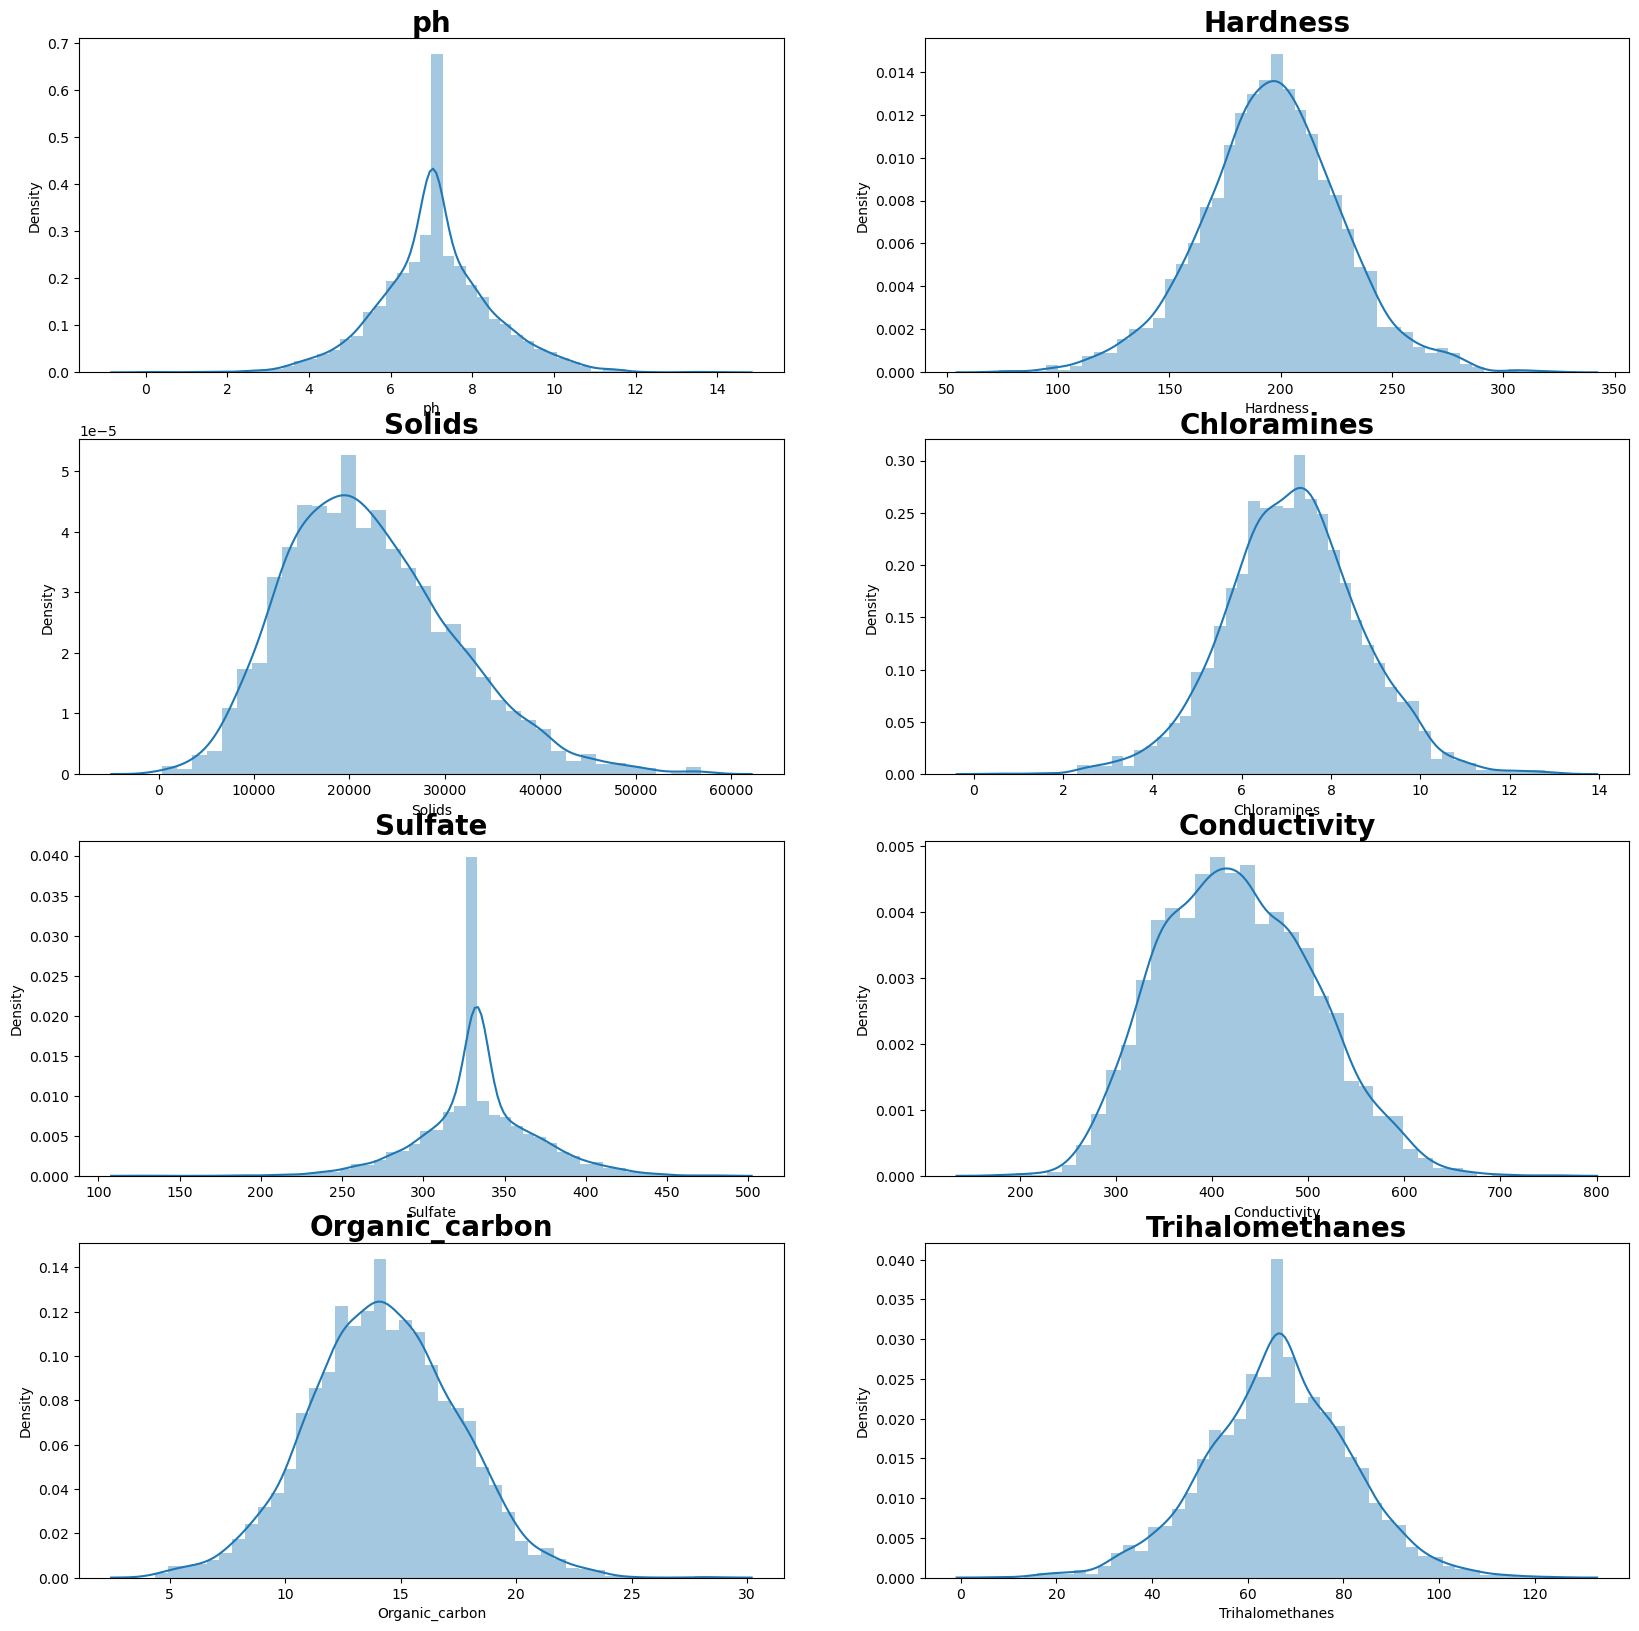

In [24]:
plt.figure(figsize=(20,20))
for i in range(8):
    plt.subplot(4,2,(i%8)+1)
    sns.distplot(X_train[X_train.columns[i]])
    plt.title(X_train.columns[i],fontdict={'size':20,'weight':'bold'},pad=3)
plt.show()

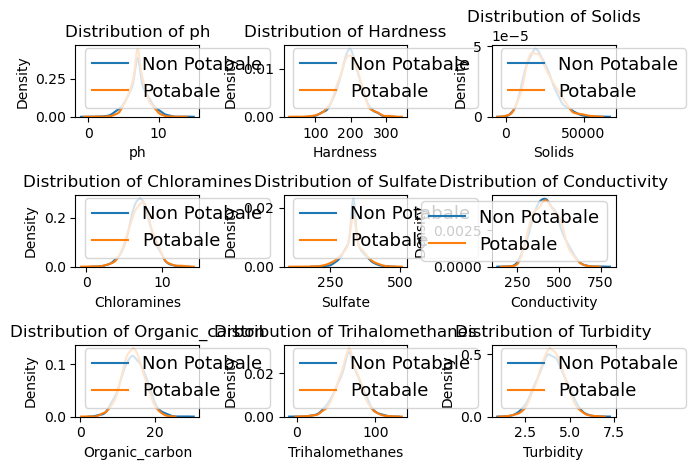

In [25]:
non_potabale = balanced.query('Potability == 0')
potabale     = balanced.query('Potability == 1')

for ax,col in enumerate(balanced.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(f'Distribution of {col}')
    sns.kdeplot(x=non_potabale[col],label='Non Potabale')
    sns.kdeplot(x=potabale[col],label='Potabale')
    plt.legend(prop=dict(size=13))
    
plt.rc('figure',figsize=(18,11))
plt.tight_layout()

In [26]:
X = balanced.drop('Potability', axis=1)
y = balanced['Potability']

**BALANCED DATASET SCALING**

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**DT TRAINING**

In [28]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

**ELM TRAINING**

In [29]:
elm_model = MLPClassifier()
elm_model.fit(X_train_scaled, y_train)

MLPClassifier()

**DT TEST ACCURACY**

In [30]:
dt_test_accuracy = dt_model.score(X_test_scaled, y_test)
print("Decision Tree Accuracy : ", ((dt_test_accuracy)*100))

Decision Tree Accuracy :  60.75000000000001


In [31]:
y_pred1 = dt_model.predict(X_test_scaled)

In [32]:
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1score = f1_score(y_test, y_pred1)

print("Decision Tree Testing Results: \n")
print("Accuracy = ", (accuracy*100), "%")
print("Precision = ", (precision*100), "%")
print("Recall = ", (recall*100), "%")
print("F1 Score = ", (f1score*100), "%")

Decision Tree Testing Results: 

Accuracy =  60.75000000000001 %
Precision =  61.004784688995215 %
Recall =  62.80788177339901 %
F1 Score =  61.89320388349514 %


**ELM TESTING**

In [33]:
elm_test_accuracy = elm_model.score(X_test_scaled, y_test)
print("elm Tree Accuracy : ", ((elm_test_accuracy)*100))

elm Tree Accuracy :  67.25


In [34]:
y_pred2 = elm_model.predict(X_test_scaled)

In [35]:
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1score = f1_score(y_test, y_pred2)

print("Extreme Learning Machine Testing Results: \n")
print("Accuracy = ", (accuracy*100), "%")
print("Precision = ", (precision*100), "%")
print("Recall = ", (recall*100), "%")
print("F1 Score = ", (f1score*100), "%")

Extreme Learning Machine Testing Results: 

Accuracy =  67.25 %
Precision =  67.14285714285714 %
Recall =  69.45812807881774 %
F1 Score =  68.28087167070218 %
